In [176]:
from datasets import load_dataset, concatenate_datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [177]:
text_emotion_dataset = load_dataset("dair-ai/emotion", name="unsplit")
reddit_emotion_dataset = load_dataset("go_emotions", "raw")
twitter_emotion_dataset = load_dataset("tweet_eval", "emotion")



In [178]:
reddit_emotion_dataset = reddit_emotion_dataset["train"]
reddit_emotion_dataset

Dataset({
    features: ['text', 'id', 'author', 'subreddit', 'link_id', 'parent_id', 'created_utc', 'rater_id', 'example_very_unclear', 'admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy', 'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief', 'remorse', 'sadness', 'surprise', 'neutral'],
    num_rows: 211225
})

In [179]:
reddit_emotion_dataset = reddit_emotion_dataset.remove_columns(["link_id", 
                                                                "author", 
                                                                "id", 
                                                                "parent_id",
                                                                "created_utc",
                                                                "subreddit",
                                                                "example_very_unclear",
                                                                "rater_id"
                                                                ])

In [180]:
reddit_emotion_dataset

Dataset({
    features: ['text', 'admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy', 'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief', 'remorse', 'sadness', 'surprise', 'neutral'],
    num_rows: 211225
})

In [181]:
reddit_emotion_features = ['admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy', 'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief', 'remorse', 'sadness', 'surprise', 'neutral']

def filter_zero_emotions(entry):
    return any(entry[emotion] > 0 for emotion in reddit_emotion_features)

def filter_single_emotion(entry):
    return sum(entry[emotion] for emotion in reddit_emotion_features) == 1

print("Original number of rows:", len(reddit_emotion_dataset))

reddit_emotion_dataset = reddit_emotion_dataset.filter(filter_zero_emotions)
reddit_emotion_dataset = reddit_emotion_dataset.filter(filter_single_emotion)

print("Filtered number of rows:", len(reddit_emotion_dataset))


Original number of rows: 211225
Filtered number of rows: 171820


In [182]:
reddit_emotion_dataset = reddit_emotion_dataset.to_pandas() 

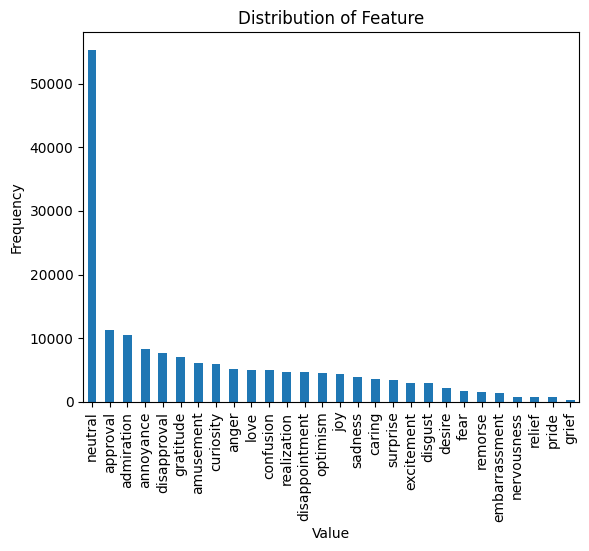

In [183]:
emotions_count = {}

for column in reddit_emotion_dataset.columns:
    if column != 'text':
        emotions_count[column] = (reddit_emotion_dataset[column] == 1).sum()

emotions_count = pd.Series(emotions_count)
emotions_count.sort_values(ascending=False, inplace=True)

emotions_count.plot(kind='bar')
plt.title('Distribution of Feature')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [184]:
reddit_emotion_dataset["label"] = pd.from_dummies(reddit_emotion_dataset[reddit_emotion_features])

In [185]:
reddit_emotion_dataset = reddit_emotion_dataset[["text", "label"]]

In [186]:
twitter_emotion_dataset = concatenate_datasets([twitter_emotion_dataset["train"], twitter_emotion_dataset["validation"], twitter_emotion_dataset["test"]])
twitter_emotion_dataset

Dataset({
    features: ['text', 'label'],
    num_rows: 5052
})

In [187]:
twitter_emotion_df = twitter_emotion_dataset.to_pandas() 
twitter_emotion_df['label'] = twitter_emotion_df['label'].astype('category')
twitter_emotion_df['label'] = twitter_emotion_df['label'].cat.rename_categories({0: "anger", 1: "joy", 2: "optimism", 3: "sadness"})
twitter_emotion_df


,text,label
0,“Worry is a down payment on a problem you may ...,optimism
1,My roommate: it's okay that we can't spell bec...,anger
2,No but that's so cute. Atsu was probably shy a...,joy
3,Rooneys fucking untouchable isn't he? Been fuc...,anger
4,it's pretty depressing when u hit pan on ur fa...,sadness
...,...,...
5047,I need a sparkling bodysuit . No occasion. Jus...,joy
5048,@user I've finished reading it; simply mind-bl...,sadness
5049,shaft abrasions from panties merely shifted to...,anger
5050,All this fake outrage. Y'all need to stop 🤣,anger


In [188]:
text_emotion_df = text_emotion_dataset["train"].to_pandas()
text_emotion_df['label'] = text_emotion_df['label'].astype('category')
text_emotion_df['label'] = text_emotion_df['label'].cat.rename_categories({0: "sadness", 1: "joy", 2: "love", 3: "anger", 4: "fear", 5: "surprise"})

text_emotion_df

,text,label
0,i feel awful about it too because it s my job ...,sadness
1,im alone i feel awful,sadness
2,ive probably mentioned this before but i reall...,joy
3,i was feeling a little low few days back,sadness
4,i beleive that i am much more sensitive to oth...,love
...,...,...
416804,that was what i felt when i was finally accept...,joy
416805,i take every day as it comes i m just focussin...,fear
416806,i just suddenly feel that everything was fake,sadness
416807,im feeling more eager than ever to claw back w...,joy


In [189]:
emotion_df = pd.concat([twitter_emotion_df, text_emotion_df, reddit_emotion_dataset])
emotion_df

,text,label
0,“Worry is a down payment on a problem you may ...,optimism
1,My roommate: it's okay that we can't spell bec...,anger
2,No but that's so cute. Atsu was probably shy a...,joy
3,Rooneys fucking untouchable isn't he? Been fuc...,anger
4,it's pretty depressing when u hit pan on ur fa...,sadness
...,...,...
171815,"Well, I'm glad you're out of all that now. How...",joy
171816,Everyone likes [NAME].,love
171817,Well when you’ve imported about a gazillion of...,caring
171818,That looks amazing,admiration


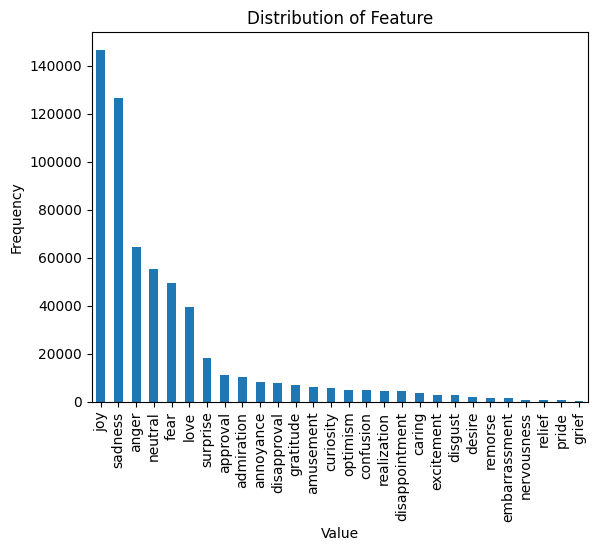

In [190]:
emotions_count = emotion_df['label'].value_counts()

emotions_count.plot(kind='bar')
plt.title('Distribution of Feature')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [191]:
emotion_df = emotion_df[emotion_df.label.isin(["text", "joy", "sadness", "anger", "neutral", "fear", "love", "surprise"])]
emotion_df

,text,label
1,My roommate: it's okay that we can't spell bec...,anger
2,No but that's so cute. Atsu was probably shy a...,joy
3,Rooneys fucking untouchable isn't he? Been fuc...,anger
4,it's pretty depressing when u hit pan on ur fa...,sadness
5,@user but your pussy was weak from what I hear...,anger
...,...,...
171811,"Wow, she headlines two shows now",neutral
171812,Youtube is my Wikipedia. Videos about any inte...,neutral
171815,"Well, I'm glad you're out of all that now. How...",joy
171816,Everyone likes [NAME].,love
